In [5]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

# Duffing ossillator

## 

$$m\ddot{x}(t) = F\left[ x(t), \dot{x}(t), t \right]$$

$$ m\ddot{x}(t)= -\gamma\dot{x} + 2ax - 4bx^3 + F_0 \cos(\omega t) $$

$$(m\nabla^2 + \gamma \nabla +4b f^2 - \frac{F_0 \cos(\omega x)}{f}) f = 2a f$$

In [66]:
n_grid=2000
x=np.linspace(1e-9,500,n_grid+1)[1:]

h=x[1]-x[0]
D=-np.eye(n_grid)+np.diagflat(np.ones(n_grid-1),1)
D = D / h

D2=D.dot(-D.T)
D2[-1,-1]=D2[0,0]

In [67]:
F0 = 1
omega = 2
gamma = 3

m = 1
a = 1./ 4
b = 1. / 2

In [79]:
f = np.ones_like(x)

f2 = np.diagflat(f * f)
one_over_f = np.diagflat(np.cos(omega * f) / f)

H = m * D2 + gamma * D + 4 * b * f2  - F0 * one_over_f

In [80]:
one_over_f

array([[-0.41614684,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.41614684,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.41614684, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.41614684,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.41614684,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.41614684]])

In [81]:
eig_harm, psi_harm = np.linalg.eigh(H)

In [82]:
print(eig_harm)

[-73.58381372 -73.58369541 -73.58349821 ...  -9.58420811  -9.58401092
  -9.5838926 ]


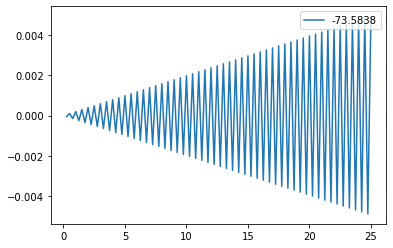

In [83]:
for i in range(1):
    plt.plot(x[:100],psi_harm[:100,i], label=f"{eig_harm[i]:.4f}")
    plt.legend(loc=1)

In [55]:
psi_harm[:100,i]

array([-2.70250059e-05,  5.40499823e-05, -8.10748994e-05,  1.08099728e-04,
       -1.35124437e-04,  1.62148999e-04, -1.89173383e-04,  2.16197560e-04,
       -2.43221500e-04,  2.70245173e-04, -2.97268550e-04,  3.24291601e-04,
       -3.51314297e-04,  3.78336608e-04, -4.05358504e-04,  4.32379956e-04,
       -4.59400934e-04,  4.86421409e-04, -5.13441351e-04,  5.40460730e-04,
       -5.67479516e-04,  5.94497681e-04, -6.21515195e-04,  6.48532027e-04,
       -6.75548148e-04,  7.02563529e-04, -7.29578141e-04,  7.56591952e-04,
       -7.83604935e-04,  8.10617059e-04, -8.37628294e-04,  8.64638612e-04,
       -8.91647982e-04,  9.18656374e-04, -9.45663760e-04,  9.72670110e-04,
       -9.99675394e-04,  1.02667958e-03, -1.05368265e-03,  1.08068455e-03,
       -1.10768528e-03,  1.13468479e-03, -1.16168305e-03,  1.18868005e-03,
       -1.21567574e-03,  1.24267010e-03, -1.26966309e-03,  1.29665470e-03,
       -1.32364488e-03,  1.35063362e-03, -1.37762087e-03,  1.40460662e-03,
       -1.43159082e-03,  

In [58]:
from tqdm import tqdm

  2%|▊                                          | 2/100 [00:01<01:26,  1.14it/s]/home/lachlan/miniconda3/envs/chem/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
  3%|█▎                                         | 3/100 [00:02<01:19,  1.23it/s]/home/lachlan/miniconda3/envs/chem/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
  4%|█▋                                         | 4/100 [00:03<01:12,  1.33it/s]/home/lachlan/miniconda3/envs/chem/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
  4%|█▋                                         | 4/100 [00:03<01:35,  1.00it/s]


KeyboardInterrupt: 

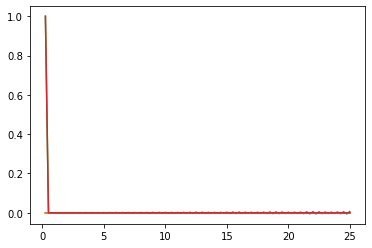

In [84]:
scf_cycle = 100
f = np.ones_like(x)
for i in tqdm(range(100)):
    

    f2 = np.diagflat(f * f)
    one_over_f = np.diagflat(np.cos(omega * x) / f)

    H = m * D2 + gamma * D + 4 * b * f2  - F0 * one_over_f
    
    eig_harm, psi_harm = np.linalg.eigh(H)
    
    f = psi_harm[:, 0]
    
    plt.plot(x[:100],psi_harm[:100,0], label=f"{eig_harm[i]:.4f}")

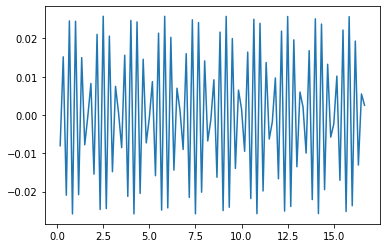

In [64]:
plt.plot(x[:100],psi_harm[:100,300], label=f"{eig_harm[i]:.4f}")

## Sympy

## 

$$m\ddot{x}(t) = F\left[ x(t), \dot{x}(t), t \right]$$

$$ m\ddot{x}(t)= -\gamma\dot{x} + 2ax - 4bx^3 + F_0 \cos(\omega t) $$

$$(m\nabla^2 + \gamma \nabla +4b f^2 - \frac{F_0 \cos(\omega x)}{f}) f = 2a f$$

In [102]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols

from sympy.abc import x

In [127]:
f = Function("f")(x)

In [128]:
f

f(x)

In [129]:
H = m*Derivative(Derivative(f)) - gamma * Derivative(f) + 4*b*f**3 - F0 * cos(omega * x) - 2*a*f

In [130]:
H

2.0*f(x)**3 - 0.5*f(x) - cos(2*x) - 3*Derivative(f(x), x) + Derivative(f(x), (x, 2))

In [137]:
dsolve(m*Derivative(Derivative(f)) - gamma * Derivative(f) + 4*b*f**3)

NotImplementedError: solve: Cannot solve 2.0*f(x)**3 - 3*Derivative(f(x), x) + Derivative(f(x), (x, 2))

# Scipy

In [138]:
V = lambda x: 0.5 * x**2 * (0.5 * x**2 - 1)
dVdx = lambda x: x**3 - x

In [166]:
def deriv(X, t, F0, gamma, omega):
    """Return the derivatives dx/dt and d2x/dt2."""

    x, xdot = X
    # xdotdot = -dVdx(x) -gamma * xdot + F0 * np.cos(omega*t)
        
    xdotdot = (-gamma * xdot + 2*a*x - 4*b*x**3 + F0 * np.cos(omega * t)) / m
    
    return xdot, xdotdot

In [167]:
from scipy.integrate import odeint, quad

In [168]:
x0, v0 = 0, 0
tmax, t_trans = 18000, 300
omega = 1.4
gamma, delta = 0.39, 0.1
dt_per_period = 100

period = 2*np.pi/omega
dt = 2*np.pi/omega / dt_per_period
step = int(period / dt)
t = np.arange(0, tmax, dt)

In [169]:
X = odeint(deriv, [0, 0], t, args=(F0, gamma, omega))

X, Xdot = X.T

In [170]:
t.shape

(401071,)

In [171]:
X.shape

(401071,)

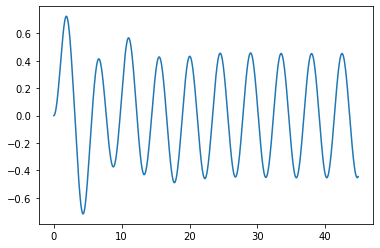

In [172]:
plt.plot(t[:1000], X[:1000])

In [173]:
X = odeint(deriv, [0, 0.1], t, args=(F0, gamma, omega))

X, Xdot = X.T

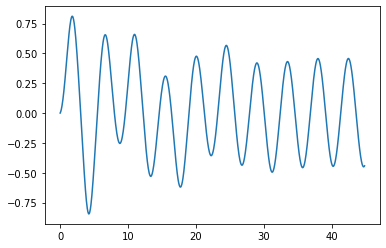

In [174]:
plt.plot(t[:1000], X[:1000])

In [179]:
F0 = 1
omega = 1
gamma = 1

m = 1
a = 1./ 4
b = 1. / 2

In [183]:
X = odeint(deriv, [0, 0.1], t, args=(F0, gamma, omega))

X, Xdot = X.T

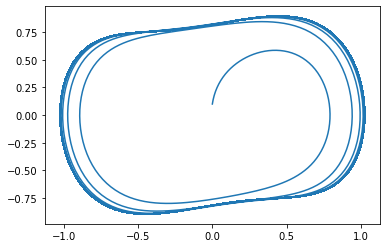

In [184]:
plt.plot(X, Xdot)